<a href="https://colab.research.google.com/github/wekers/Transfer-Learning-Cats-Dogs/blob/main/Dio_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.2V8YAY_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


<ipython-input-1-7a430e721e64>:27: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 480s 815ms/step - accuracy: 0.9190 - loss: 0.1846 - val_accuracy: 0.9654 - val_loss: 0.0901
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 414s 711ms/step - accuracy: 0.9630 - loss: 0.0893 - val_accuracy: 0.9665 - val_loss: 0.0872
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 451s 726ms/step - accuracy: 0.9669 - loss: 0.0802 - val_accuracy: 0.9658 - val_loss: 0.0866
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 488s 837ms/step - accuracy: 0.9697 - loss: 0.0743 - val_accuracy: 0.9665 - val_loss: 0.0868
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 482s 827ms/step - accuracy: 0.9723 - loss: 0.0700 - val_accuracy: 0.9656 - val_loss: 0.0872
146/146 ━━━━━━━━━━━━━━━━━━━━ 84s 572ms/step - accuracy: 0.9652 - loss: 0.0900
Accuracy: 96.56%


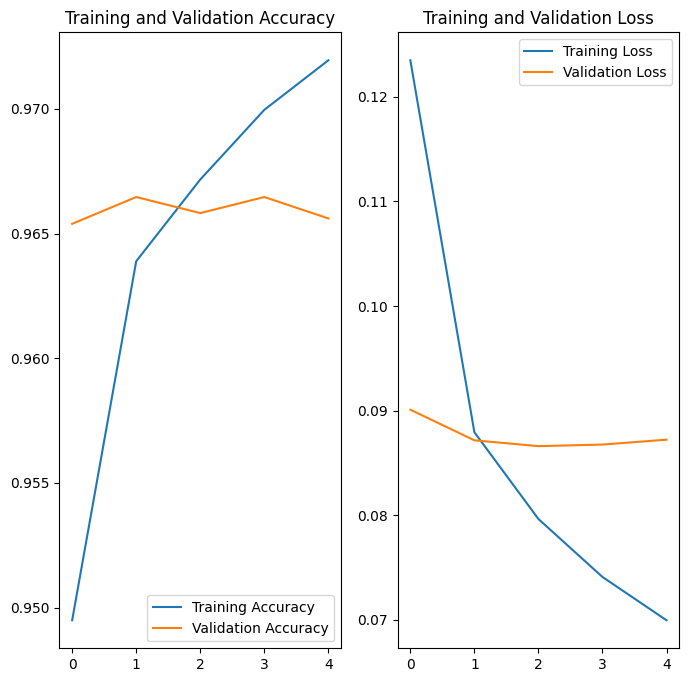

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

# Carregando o dataset de gatos e cachorros
(train_ds, validation_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

IMG_SIZE = 150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5
)

loss, accuracy = model.evaluate(validation_ds)
print(f'Accuracy: {accuracy * 100:.2f}%')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('cats_vs_dogs_transfer_learning.h5')

Saving curled-600nw-1679659792.webp to curled-600nw-1679659792.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predição: Gato com 98.44% de confiança


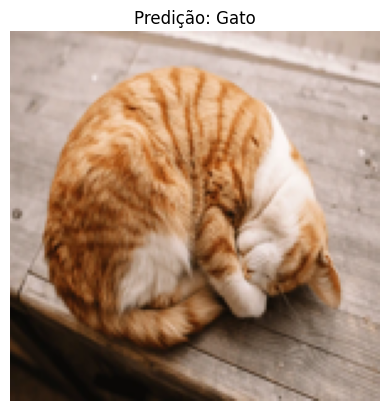

In [10]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io

# 1. Faz o upload da imagem
uploaded = files.upload()

# 2. Carrega a imagem
image_name = list(uploaded.keys())[0]
new_image = Image.open(io.BytesIO(uploaded[image_name]))

# 3. Pré-processamento da imagem
new_image = new_image.resize((IMG_SIZE, IMG_SIZE))  # Redimensiona
new_image_array = np.array(new_image) / 255.0  # Normaliza
new_image_array = np.expand_dims(new_image_array, axis=0)  # Adiciona dimensão do batch

# 4. Faz a previsão
prediction = model.predict(new_image_array)

# 5. Exibe o resultado
if prediction[0] > 0.5:
    print(f'Predição: Cachorro com {prediction[0][0] * 100:.2f}% de confiança')
else:
    print(f'Predição: Gato com {(1 - prediction[0][0]) * 100:.2f}% de confiança')

# 6. Exibe a imagem com a previsão
plt.imshow(new_image)
plt.title(f'Predição: {"Cachorro" if prediction[0] > 0.5 else "Gato"}')
plt.axis('off')
plt.show()